# Proyecto Final de Aprendizaje Automático: Clasificador de Agua Potable

Por Miguel Ferreras Chumillas y Antonio Rodríguez Hurtado

## Introducción

Nuestro proyecto final para la asignatura Aprendizaje Automático y Big Data consiste en un clasificador que, dados unos datos sobre el agua que deseemos analizar, evalúa y decide si es potable o no. Para ello, hemos utilizado varios de los modelos aprendidos en la asignatura, comparándolos con el fin de obtener el modelo que mayor eficacia muestre.

Para el entrenamiento de los modelos, hemos utilizado un dataset proveniente de la plataforma web Kaggle con la composición de distintas muestras de agua, y si éstas son provenientes de agua potable o no. A continuación, veremos el dataset con más detalle.

## Obtención de Datos y Tratamiento

### Análisis de los Datos

Los datos sobre la potabilidad del agua están guardados en un archivo con formato csv, por lo que hemos utilizado la librería Pandas de Python para facilitar su extracción y posterior tratamiento y uso. Como se puede ver a continuación, los datos están clasificados según nueve características o atributos distintos, más un atributo adicional que nos indica si el agua es potable o no.

In [5]:
datos = pd.read_csv("water_potability.csv")
datos.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
datos.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


Sin embargo, no todos los datos están completos; en algunos de ellos falta información sobre uno o varios de los atributos:

In [7]:
datos.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Por tanto, es algo que deberemos tratar más adelante si queremos que nuestros modelos se entrenen con la mayor efectividad posible.

Pero ese no es el único problema de nuestro dataset actual. Si observamos la proporción entre los casos en los que el agua es potable y en los que no, observamos que están descompensados, habiendo mayor casos de agua no potable que de agua potable. Esta desproporción puede hacer que nuestros modelos posean cierto sesgo, por lo que es necesario corregirla más adelante.

In [8]:
datos.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:ylabel='Potability'>

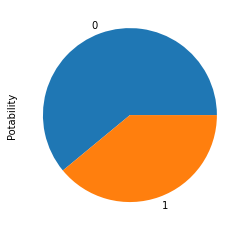

In [9]:
datos.Potability.value_counts().plot(kind='pie')

### Tratamiento de Datos

Lo primero que haremos será corregir los problemas que hemos descubierto. En primer lugar, trataremos los valores nulos dentro de nuestro dataset.

Debido a que la potabilidad del agua es un dato determinante, hemos preferido no tratar los datos con valores nulos de la forma habitual, es decir, asignándole la media global a cada uno de los atributos que faltan. En su lugar, hemos optado por descartar aquellos datos con atributos vacíos, haciendo que el conjunto de datos se reduzca pero asegurándonos de que todos los datos sean válidos.

In [10]:
datos = datos.dropna()
datos.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
datos.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

<AxesSubplot:ylabel='Potability'>

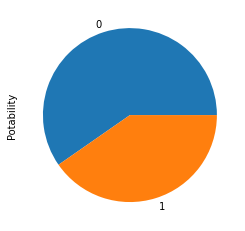

In [12]:
datos.Potability.value_counts().plot(kind='pie')

Como podemos observar, pese a que hemos eliminado parte de los datos la desproporción se mantiene, por lo que es necesario tratarla para alcanzar un equilibrio entre los datos con agua potable y con agua no potable.

Para ello, crearemos nuevos datos a partir de los ya existentes hasta alcanzar dicho equilibrio, de la siguiente forma:

<AxesSubplot:ylabel='Potability'>

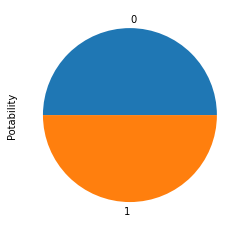

In [13]:
zero  = datos[datos['Potability']==0]  
one = datos[datos['Potability']==1] 

df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 

datos = pd.concat([zero, df_minority_upsampled])
datos = shuffle(datos) 

datos.Potability.value_counts().plot(kind='pie')

Nuestros datos ya están listos para utilizarse, por lo que ya tan solo queda dividirlos en los diferentes conjuntos de datos que vayamos a usar en nuestros modelos.

In [14]:
X = datos.drop(['Potability'], axis = 1)
y = datos['Potability']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

## Modelos del Clasificador

Aunque en la asignatura hemos aprendido más modelos, a la hora de crear el clasificador hemos decidido optar por: Regresión Logística, Support Vector Machines (SVM) y Red Neuronal. Usando estos tres modelos, podremos ver cuál de ellos se adecúa mejor a la naturaleza del clasificador y escogerlo en consecuencia.

Las métricas que usaremos para comparar los modelos son la AUC (nuestra medida principal) y la F1 Score (la utilizaremos para obtener información adicional). Con ellas, obtendremos suficiente información sobre el rendimiento general de cada modelo.

### Regresión Logística

La función que usaremos en este modelo es la misma que hemos desarrollado en clase. El código se encuentra disponible al final de la memoria, en el apéndice, y con él se obtienen los siguiente resultados:

No Skill : ROC AUC=0.500
Regresion logistica : ROC AUC=0.538


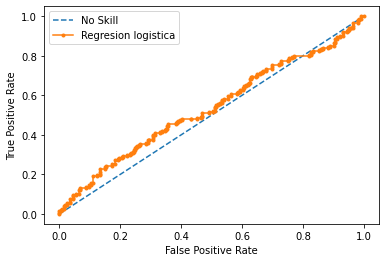

              precision    recall  f1-score   support

           0       0.55      0.40      0.46       254
           1       0.48      0.64      0.55       226

    accuracy                           0.51       480
   macro avg       0.52      0.52      0.51       480
weighted avg       0.52      0.51      0.50       480



In [25]:
regresion_logistica(x_train, y_train, x_test, y_test)

Como se puede observar, los resultados que ofrece la regresión logísticas no son demasiado buenos, por lo que, probablemente, otros modelos se adapten mejor al clasificador.

### Support Vector Machines (SVM)

Al igual que en Regresión Logística, el código de este modelo se encuentra en el Apéndice, y está sacado de los ejercicios de clase. Los resultados obtenidos son:

0.78125 100.0 %
No Skill : ROC AUC=0.500
Kernel rbf : ROC AUC=0.852


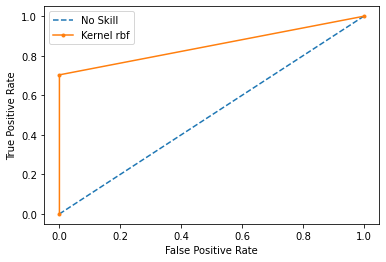

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       254
           1       1.00      0.70      0.83       226

    accuracy                           0.86       480
   macro avg       0.90      0.85      0.85       480
weighted avg       0.89      0.86      0.86       480



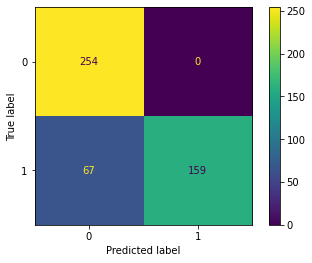

In [29]:
svm(x_train, y_train, x_test, y_test)

Esta vez los resultados son mucho mejores, dando lugar a un modelo que ya podría considerarse válido, teniendo en cuenta que posee una eficacia del 85.2% Además, gracias a la matriz de confusión, podemos ver cómo este modelo predice el 100% del agua no potable, a pesar de no ser tan preciso a la hora de predecir el agua potable. Debido a esto, este modelo puede ser especialmente útil si nuestra intención es priorizar la detección de agua no potable.

### Red Neuronal

Por último, veremos los resultados que aporta el modelo de Red Neuronal utilizado en las prácticas de la asignatura. Al igual que los otros, el código de este modelo se encuentra disponible en el apéndice final.

In [ ]:
red_neuronal(x_train, y_train, x_test, y_test)

0.7229166666666667 1.28 %


Aunque no se alcanzan los resultados del modelo SVM, los obtenidos con la Red Neuronal aún así son muy buenos. En comparación, son más equilibrados que el modelo SVM, ya que el número de resultados predichos con éxito para agua potable y no potable son prácticamente iguales.

## Conclusión

Debido a los malos resultados del modelo de Regresión Lineal, la decisión está entre el modelo que usa SVM y la Red Neuronal. Aunque la Red Neuronal aporte unos resultados más equilibrados que la SVM, ésta es capaz de predecir al 100% las aguas no potables. Por tanto, teniendo en cuenta que en determinados casos este factor puede resultar crítico, creemos que el modelo que hace uso de las SVM se adecúa mejor al uso que queremos darle al clasificador.

# Apéndice: Código

## Librerías Utilizadas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from IPython.display import clear_output
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Funciones para Regresión Logística

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hip(X, theta):
    return sigmoid(np.dot(X, theta))

def cost(theta, X, Y, m, lamda):
    return (-1 / m) * (np.dot(Y, np.log(hip(X, theta))) + np.dot((1 - Y), np.log(1 - hip(X, theta)))) + (lamda / (2 * m)) * np.sum(np.power(theta, 2))               

def gradient(theta, X, Y, m, lamda):
    gradiente =  ((1 / m) * np.matmul((hip(X, theta) - Y), X))
    result = gradiente[0]
    i = 1
    for e in gradiente[1:]:
        result = np.append(result, e + ((lamda / m) * theta[i]))
        i += 1
    return result

def regresion_logistica(x_train, y_train, x_test, y_test):
    ox_train = np.hstack([np.ones([np.shape(x_train)[0], 1]), x_train])
    ox_test = np.hstack([np.ones([np.shape(x_test)[0], 1]), x_test])
    lamda = 0.1
    theta = [0] * np.shape(ox_train)[1]
    result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(ox_train, y_train, np.shape(x_train)[0], lamda))
    theta_opt = result[0]
    au_under_dwayn(y_test, hip(ox_test,theta_opt), 'Regresion logistica')
    print(classification_report(y_test,hip(ox_test,theta_opt).round()))

## Funciones para SVM

In [27]:
def kernel_rbf(x_train, y_train, x_test, y_test):
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
    
    values = np.linspace(0.1,100, 10, dtype=float)
    best_C = 0
    best_sigma = 0
    best_acc = 0
    i = 0
    for C in values:
        for sigma in values:
            i = i+1
            svm = SVC(kernel='rbf', C=C, gamma=1 / (2 * sigma**2))
            svm.fit(x_train, y_train)
            acc = accuracy_score(y_val, svm.predict(x_val))
            clear_output(wait=True)
            if acc > best_acc:
                best_C = C
                best_sigma = sigma
                best_acc = acc
            print(best_acc, i * 100/len(values)**2, '%')
    return best_C, best_sigma

def svm(x_train, y_train, x_test, y_test):
    best_C, best_sigma = kernel_rbf(x_train, y_train, x_test, y_test)
    svm = SVC(kernel='rbf', C=best_C, gamma=1 / (2 * best_sigma**2), probability=True)
    svm.fit(x_train, y_train)
    y_score = svm.decision_function(x_test)

    au_under_dwayn(y_test, svm.predict(x_test), 'Kernel rbf')
    print(classification_report(y_test,np.where(y_score > 0, 1, 0)))
    cm = confusion_matrix(y_test, np.where(y_score > 0, 1, 0))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
    disp.plot()

## Funciones para la Red Neuronal

In [52]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hip(a, b):
    return sigmoid(np.matmul(a, b))

def forward_propagate(X, Theta1, Theta2):
    m = X.shape[0]
    A1 = np.hstack([np.ones([m, 1]), X])
    Z2 = np.dot(A1, Theta1.T)
    A2 = np.hstack([np.ones([m, 1]), sigmoid(Z2)])
    Z3 = np.dot(A2, Theta2.T)
    H = sigmoid(Z3)
    return A1, Z2, A2, Z3, H

def cost(H, Y, Theta1, Theta2, reg):
    m = len(Y)
    th1 = np.delete(Theta1, 0, axis=1)
    th2 = np.delete(Theta2, 0, axis=1)
    suma = 0
    for i in range(m):
        suma += np.sum((np.matmul(-Y[i,:], np.log(H[i,:])) - np.matmul((1 - Y[i,:]), np.log(1 - H[i,:]))))
    return ((1 / m) * suma) + ((reg / (2 * m)) * (np.sum(np.power(th1, 2)) + np.sum(np.power(th2, 2))))

def cash_converter(H):
    x = []
    for e in H:
        if e[0] > e[1]:
            x.append(0)
        else:
            x.append(1)
    return x

def backprop(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg):
    m = X.shape[0]
    Theta1 = np.reshape(params_rn[:num_ocultas * (num_entradas + 1)], (num_ocultas, (num_entradas + 1)))
    Theta2 = np.reshape(params_rn[num_ocultas * (num_entradas + 1):], (num_etiquetas, (num_ocultas + 1)))
    A1, Z2, A2, Z3, H = forward_propagate(X, Theta1, Theta2)

    coste = cost(H, y, Theta1, Theta2, reg)

    Delta1, Delta2 = np.zeros(Theta1.shape), np.zeros(Theta2.shape)
    sigma3 = (H - y)
    Delta2 += np.dot(sigma3.T, A2)
    Delta1 += np.dot(np.delete(np.dot(sigma3, Theta2) * (A2 * (1 - A2)), 0, axis=1).T, A1)
    D1 = Delta1 / m
    D2 = Delta2 / m
    D1[:, 1:] = D1[:, 1:] + (reg * Theta1[:, 1:]) / m
    D2[:, 1:] = D2[:, 1:] + (reg * Theta2[:, 1:]) / m
   
    return coste, np.concatenate((D1, D2), axis=None)

def pesosAleatorios(L_in, L_out):
    ini_epsilon = 0.12
    theta = np.random.rand(L_out, 1 + L_in) * (2*ini_epsilon) - ini_epsilon 
    return theta 

def train(X, y, reg, iters):
    num_entradas = X.shape[1]
    num_ocultas = 128
    num_etiquetas = 2

    theta1 = pesosAleatorios(num_entradas, num_ocultas)
    theta2 = pesosAleatorios(num_ocultas, num_etiquetas)
    params = np.concatenate((np.ravel(theta1), np.ravel(theta2)))

    fmin = opt.minimize(fun=backprop, x0=params, 
                 args=(num_entradas, num_ocultas, num_etiquetas, X, y, reg),
                 method='TNC', jac=True, options={'maxiter' : iters})

    theta1 = np.reshape(fmin.x[:num_ocultas * (num_entradas + 1)],
                       (num_ocultas, (num_entradas + 1)))
    theta2 = np.reshape(fmin.x[num_ocultas * (num_entradas + 1):],
                       (num_etiquetas, (num_ocultas + 1)))
    
    return theta1, theta2

def predictions(X, theta1, theta2):
    a1, z2, a2, z2, h = forward_propagate(X, theta1, theta2)
    predictions = np.argmax(h, axis=1)
    return predictions

def red_neuronal(x_train, y_train, x_test, y_test):
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
    y_onehot = np.zeros((np.shape(x_train)[0], 2))
    for i in range(np.shape(x_train)[0]):
        y_onehot[i][y_train.iloc[i]] = 1.0
    
    best_acc = 0
    best_reg = 0
    best_iters = 0
    i = 0
    reg_values = np.linspace(0.1,100, 25, dtype=float)
    iters_values = np.linspace(1,500, 25, dtype=int)
    for reg in reg_values:
        for iters in iters_values:
            i = i + 1
            theta1, theta2 = train(x_train, y_onehot, reg=reg, iters=iters)
            predictions(x_val, theta1, theta2)
            acc = accuracy_score(y_val, predictions(x_val, theta1, theta2))
            clear_output(wait=True)
            if acc > best_acc:
                best_reg = reg
                best_iters = iters
                best_acc = acc
            print(best_acc, i * 100/(len(reg_values) * len(iters_values)), '%')
    
    theta1, theta2 = train(x_train, y_onehot, reg=best_reg, iters=best_iters)
    pre = predictions(x_test, theta1, theta2)
    au_under_dwayn(y_test, pre, 'Red neuronal')
    print(classification_report(y_test,pre))
    cm = confusion_matrix(y_test, pre)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

## Otras Funciones

In [18]:
def au_under_dwayn(y_test, lr_probs, model):  
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # keep probabilities for the positive outcome only
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill : ROC AUC=%.3f' % (ns_auc))
    print(model,': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=model)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()